In [90]:
# unigram probs on nltk shakespeare corpus
# visualize the distribution of unigram probs

# compute unigram and bigram probs on shakespeare corpus

# bigram probs on shakespeare corpus
# trigram probs on shakespeare corpus
# print top ten uni, bi, trigrams and their counts
# print top ten uni, bi, trigrams and their probs


# calculate perplexity of a sentence
# print uni, bi, tri perplexity of a sentence



# smoothing

# laplace smoothing
# good turing smoothing

# print top ten uni, bi, trigrams after smoothing

# Ngram model

In [91]:
#Download the shakespeare corpus

import nltk
nltk.download('shakespeare')

[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

In [92]:
# Read the shakespear corpus from nltk

from nltk.corpus import shakespeare

corpus = ""

for fileid in shakespeare.fileids():
    play = shakespeare.xml(fileid)
    for p in play:
        corpus += "".join(p.tag)
        corpus += " \n\n\n\n "
        corpus += " ".join(list(p.itertext()))
        corpus += " \n\n\n\n "

corpus

"TITLE \n\n\n\n The Tragedy of Antony and Cleopatra \n\n\n\n PERSONAE \n\n\n\n \n Dramatis Personae \n\n\n \n MARK ANTONY \n OCTAVIUS CAESAR \n M. AEMILIUS LEPIDUS \n triumvirs. \n \n\n SEXTUS POMPEIUS \n\n \n DOMITIUS ENOBARBUS \n VENTIDIUS \n EROS \n SCARUS \n DERCETAS \n DEMETRIUS \n PHILO \n friends to Antony. \n \n\n\n \n MECAENAS \n AGRIPPA \n DOLABELLA \n PROCULEIUS \n THYREUS \n GALLUS \n MENAS \n friends to Caesar. \n \n\n\n \n MENECRATES \n VARRIUS \n friends to Pompey. \n \n\n TAURUS, lieutenant-general to Caesar. \n CANIDIUS, lieutenant-general to Antony. \n SILIUS, an officer in Ventidius's army. \n EUPHRONIUS, an ambassador from Antony to Caesar. \n\n \n ALEXAS \n MARDIAN, a Eunuch. \n SELEUCUS \n DIOMEDES \n attendants on Cleopatra. \n \n\n A Soothsayer.  \n A Clown.  \n CLEOPATRA, queen of Egypt. \n OCTAVIA, sister to Caesar and wife to Antony. \n\n \n CHARMIAN \n IRAS \n attendants on Cleopatra. \n \n\n Officers, Soldiers, Messengers, and other Attendants. \n \n\n\n\n 

# Recap text preprocessing and cleaning

In [93]:
# from tutorial2 import stemming and stopwordremoval module
import re
import contractions
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def remove_punctuations(text):
    """Remove punctuations from a sample string except for periods"""
    return re.sub(r'[^\w\s.]','',text)

stop_words = stopwords.words('english')
def remove_stopwords(text):
    """Remove stopwords from a sample string"""
    return [word for word in text if word not in stop_words]


def clean_text(text):
    """Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers."""
    text = text.lower()
    # replace contractions
    text = replace_contractions(text)
    # remove URLs
    text = remove_URL(text)
    # tokenize text 
    text = word_tokenize(text)
    # remove punctuations
    for i in range(len(text)):
        text[i] = remove_punctuations(text[i])
    # stem words
    snowball = SnowballStemmer(language='english')
    stemmed = [snowball.stem(word) for word in text]
    # remove stopwords
    filtered = remove_stopwords(stemmed)
    return " ".join(filtered)

corpus = clean_text(corpus)
corpus

'titl tragedi antoni cleopatra persona dramati persona mark antoni octavius caesar m. aemilius lepidus triumvir . sextus pompeius domitius enobarbus ventidius ero scarus derceta demetrius philo friend antoni . mecaena agrippa dolabella proculeius thyreus gallus mena friend caesar . menecr varrius friend pompey . taurus  lieutenantgener caesar . canidius  lieutenantgener antoni . silius  offic ventidius armi . euphronius  ambassador antoni caesar . alexa mardian  eunuch . seleucus diomed attend cleopatra . soothsay . clown . cleopatra  queen egypt . octavia  sister caesar wife antoni . charmian ira attend cleopatra . offic  soldier  messeng  attend . scndescr scene sever part roman empir . playsubt antoni cleopatra act act scene i. alexandria . room cleopatra palac . enter demetrius philo philo nay  dotag general oerflow measur  good eye  file muster war glow like plate mar  bend  turn  offic devot view upon tawni front  captain heart  scuffl great fight hath burst buckl breast  reneg t

# Word frequency 

# Question 1: Compute the unigram frequencies of the words in the corpus

[('thou', 1129), ('shall', 820), ('come', 817), ('love', 686), ('thi', 674), ('lord', 666), ('good', 631), ('thee', 626), ('caesar', 573), ('let', 569)]


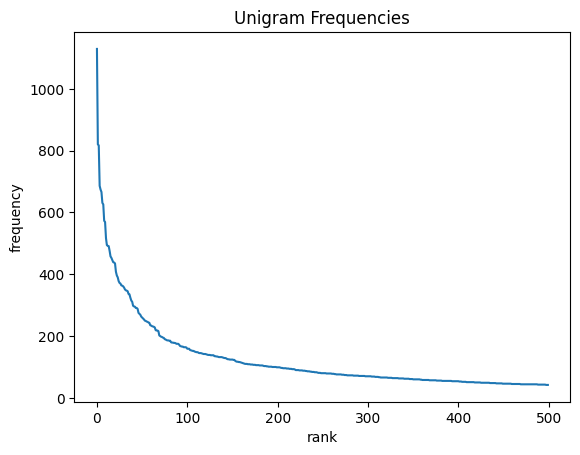

In [94]:
#Answer 1:


from collections import Counter
# Answer 1: 
def count_unigrams(corpus):
    """Count the unigrams in a corpus and sort in descending order of counts"""
    ################################################
    # Your answer goes here
    unigrams = {}
    # remove periods and store words in a list
    words = corpus.replace('.', '')
    words = words.split()
    for word in words:
        if word not in unigrams:
            unigrams[word] = 1
        else:
            unigrams[word] += 1

    ################################################
    # put your dictionary of counts in a Counter object
    unigrams = Counter(unigrams)
    #sort the unigrams in descending order of counts
    unigrams = unigrams.most_common()
    return unigrams

counter_count_unigrams = count_unigrams(corpus)
# print the top 10 unigrams and their counts
print(counter_count_unigrams[:10])

#Visualize the distribution of unigram probabilities

from matplotlib import pyplot as plt

def plot_unigram_counts(counter_count_unigrams):
    counter_count_unigrams = counter_count_unigrams[:500] # plot the top 500 unigrams to view the distribution more clearly
    # get the counts from the counter object
    counts = [count for word, count in counter_count_unigrams]

    #compute the probabilities
    total = sum(counts)
    probs = [count/total for count in counts]
    
    plt.plot(counts)
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.title('Unigram Frequencies')
    plt.show()

plot_unigram_counts(counter_count_unigrams)

#Note: You should see that the unigram frequencies follow Zipf's law
#Zipf's law states that the frequency of a word is inversely proportional to its rank in the frequency table
# i.e. the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

# Bigrams

# Question 2a: Compute the bigram frequencies of the words in the corpus
# Question 2b: Compute the bigram probabilities of the words in the corpus

[('mark antoni', 286), ('domitius enobarbus', 138), ('octavius caesar', 134), ('let us', 128), ('king claudius', 120), ('exeunt scene', 110), ('thou art', 93), ('thou hast', 89), ('lord polonius', 86), ('queen gertrud', 81)]


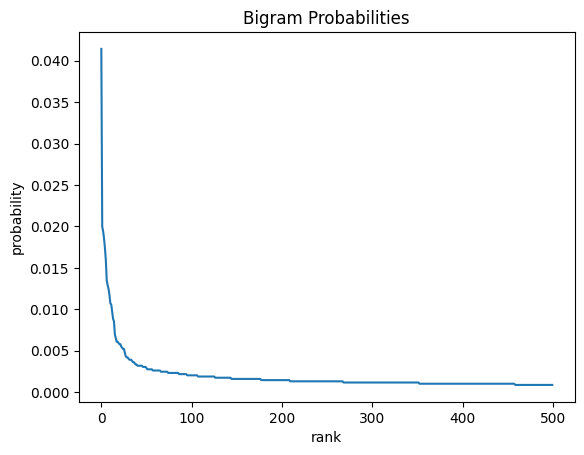

In [95]:
#Answer 2a/2b:


def count_bigrams(corpus):
    """Count the bigrams in a corpus and sort in descending order of counts"""

    ################################################
    # Answer 2a: Compute the bigram frequencies of the words in the corpus
    ################################################
    # Your answer goes here
    bigrams = Counter()
    for sentence in corpus.split('.'):
        words = sentence.split()
        for i in range(len(words)-1):
            bigrams[words[i] + ' ' + words[i+1]] += 1

    # Sort the bigrams in descending order of counts
    bigrams = bigrams.most_common()

    return bigrams
        
    

counter_count_bigrams = count_bigrams(corpus)
# print the top 10 unigrams and their counts
print(counter_count_bigrams[:10])

#Visualize the distribution of bigram frequencies

from matplotlib import pyplot as plt

def plot_bigram_probs(counter_count_bigrams):
    counter_count_bigrams = counter_count_bigrams[:500] # plot the top 500 bigrams to view the distribution more clearly
    # get the counts from the counter object
    counts = [count for word, count in counter_count_bigrams]
    # get the probabilities from the counts

    ################################################
    #Answer 2b: Compute the bigram probabilities of the words in the corpus
    ################################################
    # Your answer goes here
    probs = [count/sum(counts) for count in counts]
    ################################################

    #clear the plot
    plt.clf()
    # plot the probabilities
    plt.plot(probs)
    plt.xlabel('rank')
    plt.ylabel('probability')
    plt.title('Bigram Probabilities')
    plt.show()

plot_bigram_probs(counter_count_bigrams)
#Note: You should see that the bigram probabilities follow also Zipf's law
#Note the difference between the unigram and bigram probabilities
#Bigram probablities are 

# Trigram model

# Question 3a: Compute the trigram frequencies of the corpus 
# Question 3b: Plot the trigram frequencies

[('exeunt scene ii', 32), ('exeunt scene iii', 22), ('exeunt act act', 22), ('enter mark antoni', 18), ('exeunt scene iv', 15), ('exeunt scene v', 14), ('fare thee well', 12), ('enter octavius caesar', 12), ('three thousand ducat', 12), ('let us go', 11)]


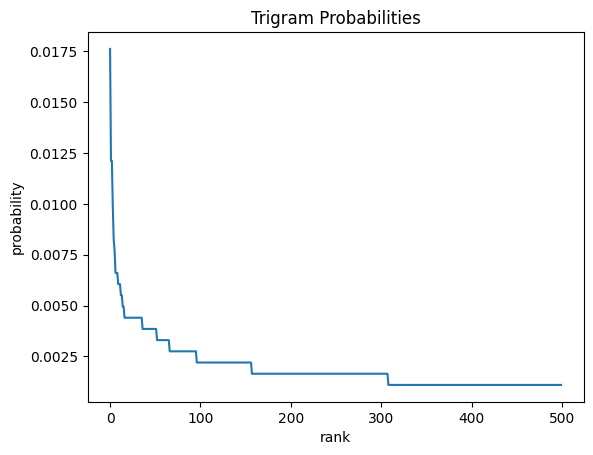

In [96]:
# Answer 3a/3b:


def count_trigrams(corpus):
    """Count the bigrams in a corpus and sort in descending order of counts"""
    ################################################
    # Answer to Question 3a
    ################################################
    # Your answer goes here
    trigrams = {}
    for sentence in corpus.split('.'):
        words = sentence.split()
        for i in range(len(words)-2): 
            trigram = words[i] + ' ' + words[i+1] + ' ' + words[i+2]
            if trigram in trigrams:
                trigrams[trigram] += 1
            else:
                trigrams[trigram] = 1

    ################################################
    # put your dictionary of counts in a Counter object
    trigrams = Counter(trigrams)
    #sort the bigrams in descending order of counts
    trigrams = trigrams.most_common()
    return trigrams

counter_count_trigrams = count_trigrams(corpus)
# print the top 10 unigrams and their counts
print(counter_count_trigrams[:10])

#Visualize the distribution of unigram probabilities

from matplotlib import pyplot as plt

def plot_trigram_probs(counter_count_trigrams):
    counter_count_trigrams = counter_count_trigrams[:500] # plot the top 500 unigrams to view the distribution more clearly
    # get the counts from the counter object
    counts = [count for word, count in counter_count_trigrams]
    ################################################
    # Answer to Question 3b
    ################################################
    # get the probabilities from the counts
    probs = [count/sum(counts) for count in counts]

    ################################################
    # plot the probabilities
    plt.plot(probs)
    plt.xlabel('rank')
    plt.ylabel('probability')
    plt.title('Trigram Probabilities')
    plt.show()

plot_trigram_probs(counter_count_trigrams)
#Note: You should see that the trigram frequencies follow Zipf's law

The graph is not as smooth as the unigram graph


This boils down to <font color="red"> **data sparsity** </font>: 

Data sparsity is defined as the phenomenon that the number of possible n-grams is exponentially large,
but the number of n-grams that actually occur is much smaller.

The corpus has more trigrams than unigrams. In terms of frequencies, these ngrams are less frequent than the unigrams.
As the rank of the trigram increases, the frequency decreases more rapidly than unigram frequencies because of the data sparsity problem.

As your n-gram length increases, the amount of times you will see any given n-gram will decrease: 
In the most extreme example, if you have a corpus where the maximum document length is n tokens and you are looking for an m-gram where m=n+1, 
you will, of course, have no data points at all because it's simply not possible to have a sequence of that length in your data set. 
The more sparse your data set, the worse you can model it. 


For this reason, despite that a higher-order n-gram model, in theory, contains more information about a word's context, 
it cannot easily generalize to other data sets (known as <font color="red"> **overfitting** </font>) 

# Conditional probabilities

# Question 4:

Compute the bigram probabilities for the sentence 'Romeo hath killed the king'.  You should use the bigram counts from the previous question.  
You should also add a start symbol \<s\> and end symbol \</s\> to the sentence.

This time the bigram model is a table of probabilities.  The table should be a dictionary of dictionaries.  
The outer dictionary is indexed by the first word of the bigram, and the inner dictionary is indexed by the second word of the bigram.  
The value of the inner dictionary is the probability of the bigram.

In [97]:
# Answer 4a:

#compute probability of a sentence using bigram language model

#make the bigram model 
def bigram_model(corpus):
    bigram = {}

    ############################################################
    ######################Enter code here#######################
    sentences = corpus.split('.')
    for sentence in sentences:
        sentence = "<s> " + sentence + " </s>"
        sentence = sentence.split()
        for i in range(len(sentence)-1):
            word = sentence[i]
            next_word = sentence[i+1]
            if word not in bigram:
                bigram[word] = Counter()
            bigram[word][next_word] += 1
    ############################################################
    return bigram

bigram_model(corpus)

#compute probability of a sentence using bigram language model
sentence = 'romeo hath kill king' #let us provide a stemmed sentence
sentence = sentence.lower()
#add <s> and </s> to the sentence
sentence = '<s> ' + sentence + ' </s>'

bigram = bigram_model(corpus)
print('The bigram model is a table that contains the counts of bigrams in the corpus')
print('It is a nested dictionary where the first word is the key of the outer dictionary')
print('The value of the outer dictionary is another dictionary')
print('The second word is the key of the inner dictionary')
print('The value of the inner dictionary is the count of the bigram\n\n')

print(bigram)

#compute probability of a sentence using bigram language model

def bigram_prob(sentence, bigram): 
    ############################################################
    ######################Enter code here#######################
    sentence = sentence.split()
    prob = 1
    for w1, w2 in zip(sentence[:-1], sentence[1:]):
        print(w1, w2, bigram[w1][w2])
        prob *= bigram[w1][w2] / sum(bigram[w1].values())
    ############################################################
    return prob

print(bigram_prob(sentence, bigram))

The bigram model is a table that contains the counts of bigrams in the corpus
It is a nested dictionary where the first word is the key of the outer dictionary
The value of the outer dictionary is another dictionary
The second word is the key of the inner dictionary
The value of the inner dictionary is the count of the bigram


{'<s>': Counter({'enter': 356, 'hamlet': 250, 'exeunt': 215, 'exit': 203, 'othello': 153, 'iago': 148, 'cleopatra': 147, 'mark': 137, 'brutus': 134, 'romeo': 118, 'come': 112, 'desdemona': 107, 'first': 103, 'cassius': 102, 'portia': 93, 'macbeth': 89, 'octavius': 78, 'domitius': 74, 'lord': 72, 'king': 68, 'ladi': 67, 'juliet': 65, 'cassio': 63, 'emilia': 60, 'horatio': 58, 'good': 57, 'bassanio': 54, 'second': 52, 'shylock': 52, 'nurs': 51, 'thou': 49, 'mercutio': 48, 'let': 46, 'queen': 46, 'go': 45, 'antoni': 45, 'macduff': 45, 'gratiano': 44, 'friar': 44, 'caesar': 42, 'reenter': 41, 'laert': 41, 'demetrius': 40, 'pompey': 39, 'antonio': 39, 'charmian': 38,

# Question 5:

Compute the trigram probabilities for the sentence 'Romeo hath killed the king'.  You should use the bigram counts from the previous question.  
You should also add a start symbol \<s\> and end symbol \</s\> to the sentence.

In [105]:
# Answer 4a:

#compute probability of a sentence using trigram language model

#make the trigram model 
def trigram_model(corpus):
    trigram = {}

    ############################################################
    ######################Enter code here#######################
    sentences = corpus.split('.')
    for sentence in sentences:
        sentence = sentence.lower()
        sentence = '<s> ' + sentence + ' </s>'
        sentence = sentence.split()
        for w1, w2, w3 in zip(sentence[:-2], sentence[1:-1], sentence[2:]):
            if w1 not in trigram:
                trigram[w1] = {}
            if w2 not in trigram[w1]:
                trigram[w1][w2] = {}
            if w3 not in trigram[w1][w2]:
                trigram[w1][w2][w3] = 0
            trigram[w1][w2][w3] += 1

    ############################################################
    return trigram

trigram_model(corpus)

#compute probability of a sentence using bigram language model
sentence = 'romeo hath kill king' #let us provide a stemmed sentence
sentence = sentence.lower()
#add <s> and </s> to the sentence
sentence = '<s> ' + sentence + ' </s>'

trigram = trigram_model(corpus)

# print(trigram)

#compute probability of a sentence using trigram language model

def trigram_prob(sentence, trigram, bigram): 
    ############################################################
    ######################Enter code here#######################
    sentence = sentence.split()
    prob = 1
    for w1, w2, w3 in zip(sentence[:-2], sentence[1:-1], sentence[2:]):
        if w1 in trigram and w2 in trigram[w1] and w3 in trigram[w1][w2]:
            product = trigram[w1][w2][w3] / bigram[w1][w2]
            prob *= product
            print(w1, w2, w3, product)
        else:
            prob = 0
            print(w1, w2, w3, 0)
            # break
    ############################################################
    return prob

print(trigram_prob(sentence, trigram, bigram))

<s> romeo hath 0
romeo hath kill 0
hath kill king 0.2
kill king </s> 0
0


These are the trigrams and their respective conditional probabilities:

* \<s\> romeo hath 0

* romeo hath kill 0

* hath kill king 0.2

* kill king \</s\> 0

Note that "romeo hath kill" has a conditional probability of 0, which means that the trigram "romeo hath kill" is not in the training corpus. This is because our corpus is quite small.

If we were to use a larger corpus, we would have more trigrams and the conditional probabilities would be more accurate.

References:

* https://medium.com/mti-technology/n-gram-language-models-70af02e742ad

In [ ]:
# ChatGPT:

#Answer about trigram. Copied the code from bigram model. The loop runs out of index because the last word in the sentence is not in the trigram model.
# Boils down to replacing i-1 with i-2 in the loop.